## **Importing libraries and cancer dataset**

In [1]:
# importing the cancer data
from sklearn.datasets import load_breast_cancer
# importing the libraries required throughout the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'], ['target']))
df 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## **Data Visualization**

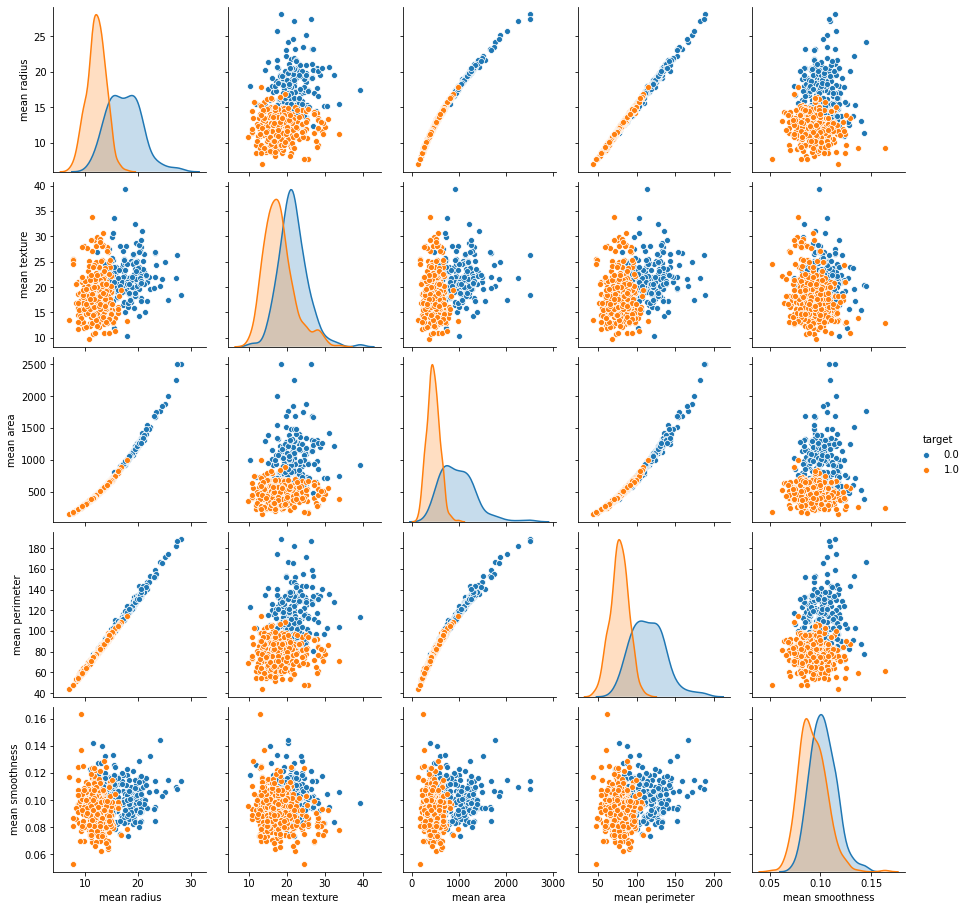

In [4]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

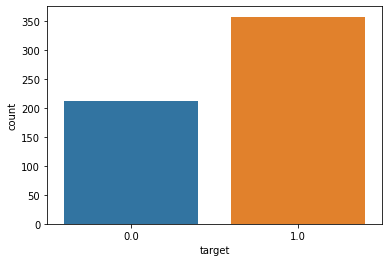

In [5]:
sns.countplot(df['target'], label = 'Count')

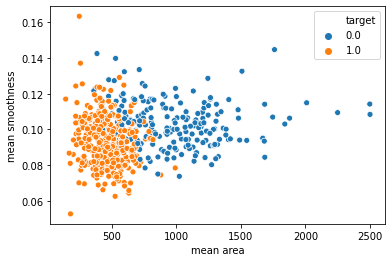

In [6]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

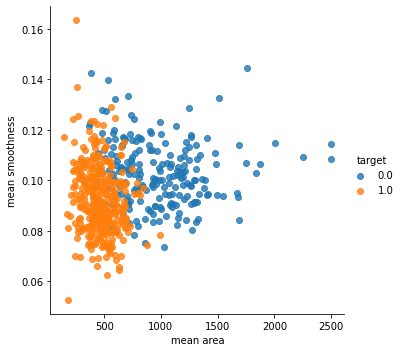

In [7]:
sns.lmplot('mean area', 'mean smoothness', hue = 'target', data = df, fit_reg = False)

**Correlation between variables**

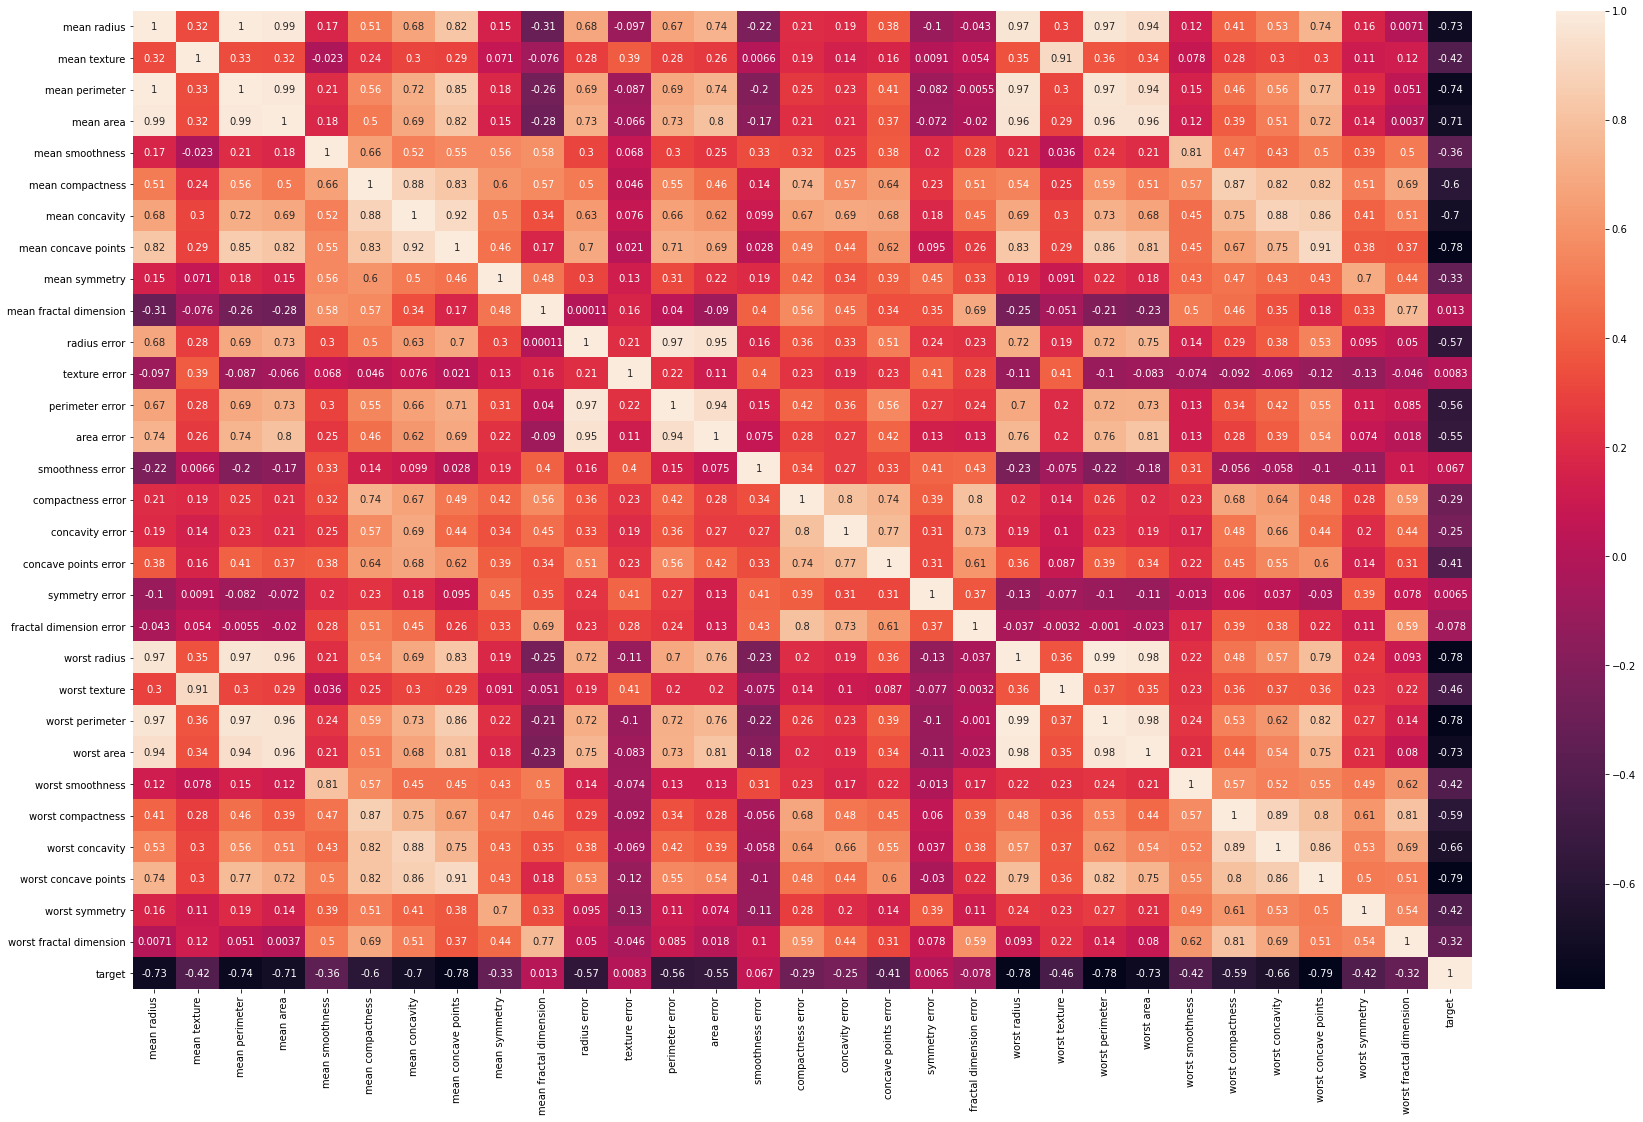

In [8]:
plt.figure(figsize = (30,18))
sns.heatmap(df.corr(), annot = True)

##**Conclusion:**
There is a strong correlation between the mean radius and mean perimeter as well as mean area and mean perimeter.

## **Training the Model**

In [9]:
# extracting target label column
x = df.drop(['target'], axis = 1)
y = df['target']

In [10]:
# splitting training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [11]:
# fitting the model
svcModel = SVC()
svcModel.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Model Evaluation**

In [12]:
y_predict = svcModel.predict(x_test)

In [13]:
confusionMatrix = confusion_matrix(y_test, y_predict)

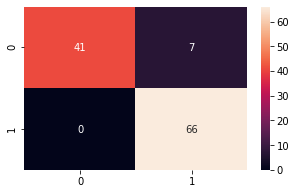

In [14]:
plt.figure(figsize = (5,3))
sns.heatmap(confusionMatrix, annot = True)

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



# **Improving Model**

In [16]:
trainingDataRange = (x_train - x_train.min()).max()
scaledXTrain = (x_train - x_train.min()) / trainingDataRange

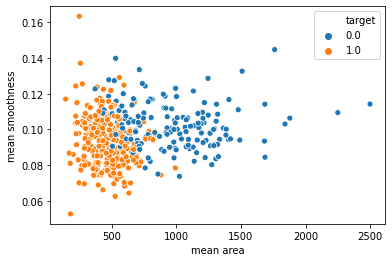

In [17]:
sns.scatterplot(x = x_train['mean area'], y = x_train['mean smoothness'], hue = y_train)

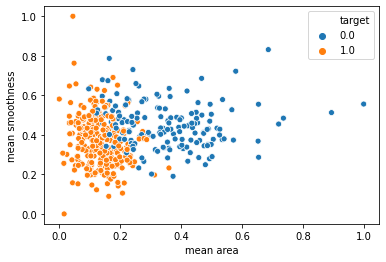

In [18]:
sns.scatterplot(x = scaledXTrain['mean area'], y = scaledXTrain['mean smoothness'], hue = y_train)

In [19]:
testDataRange = (x_test - x_test.min()).max()
scaledXTest = (x_test - x_test.min()) / testDataRange 

In [20]:
svcModel = SVC()
svcModel.fit(scaledXTrain, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_predict = svcModel.predict(scaledXTest)

In [22]:
confusionMatrix = confusion_matrix(y_test, y_predict)

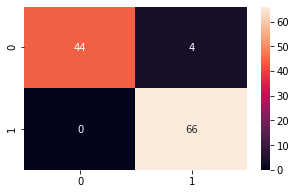

In [23]:
plt.figure(figsize = (5,3))
sns.heatmap(confusionMatrix, annot = True, fmt = 'd')

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [25]:
parameterGrid = {'C' : [0.1, 1, 10, 100], 'gamma' : [1, 0.1, 10, 100], 'kernel' : ['rbf']}
svcModel = SVC()
grid = GridSearchCV(svcModel, parameterGrid, refit = True, verbose = 4)
grid.fit(scaledXTrain, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.637, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 10, 100],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [26]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [27]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
gridPredictions = grid.predict(scaledXTest)
gridPredictions

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [29]:
confusionMatrix = confusion_matrix(y_test, gridPredictions)

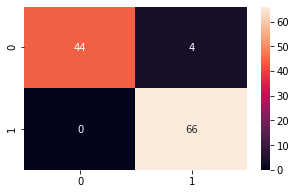

In [30]:
plt.figure(figsize = (5,3))
sns.heatmap(confusionMatrix, annot = True)

In [31]:
print(classification_report(y_test, gridPredictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

